In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from tensorflow import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Train.csv')

In [ ]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
training_set=train.iloc[:,1:2].values

In [ ]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [ ]:
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
training_set_scaled.shape

(1258, 1)

In [ ]:
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
#reshape it to (batche_size(#size of inputs),timesteps,input_dimension)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
X_train.shape

(1198, 60, 1)

In [ ]:
regressor=Sequential()

In [ ]:
regressor.add(LSTM(units=100,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.4))

In [ ]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [ ]:
regressor.add(LSTM(units=100,return_sequences=True))
regressor.add(Dropout(0.6))

In [ ]:
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.4))

In [ ]:
regressor.add(Dense(units=1))

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 19s 219ms/step - loss: 0.0333
Epoch 2/100
38/38 [==============================] - 10s 275ms/step - loss: 0.0085
Epoch 3/100
38/38 [==============================] - 10s 258ms/step - loss: 0.0073
Epoch 4/100
38/38 [==============================] - 9s 228ms/step - loss: 0.0069
Epoch 5/100
38/38 [==============================] - 10s 271ms/step - loss: 0.0066
Epoch 6/100
38/38 [==============================] - 9s 243ms/step - loss: 0.0078
Epoch 7/100
38/38 [==============================] - 9s 245ms/step - loss: 0.0061
Epoch 8/100
38/38 [==============================] - 15s 388ms/step - loss: 0.0057
Epoch 9/100
38/38 [==============================] - 11s 282ms/step - loss: 0.0047
Epoch 10/100
38/38 [==============================] - 9s 233ms/step - loss: 0.0047
Epoch 11/100
38/38 [==============================] - 10s 255ms/step - loss: 0.0050
Epoch 12/100
38/38 [==============================] - 10s 272ms/step - loss: 0.0056
Epoch

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Google_Stock_Price_Test.csv')
real_stock_price = test.iloc[:, 1:2].values
total_data=pd.concat([train['Open'],test['Open']],axis=0)

In [ ]:
inputs=total_data[len(train)-len(test)-60:].values
inputs=inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test.shape
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


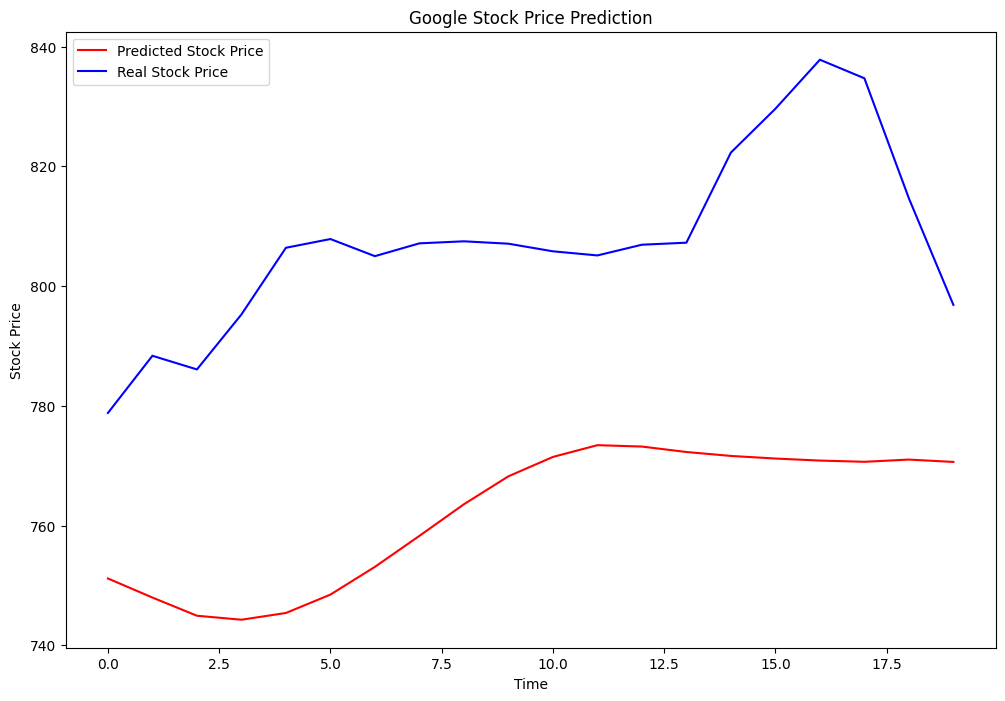

In [ ]:
#Visualization
plt.rcParams["figure.figsize"] = (12,8)
plt.plot(predicted_stock_price,color='red',label='Predicted Stock Price')
plt.plot(real_stock_price,color='blue',label='Real Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()